# Delivery one
Import libraries

In [126]:
import math, matplotlib.pyplot as plt

IVP Problem 
$u' = f(u, t) = \frac{u^2+u}{t}$

Define functions

In [127]:
def exact_solution(u, a, b, k):
    N = math.ceil((b-a)/k) + 1
    k = (b-a)/N
    
    y = []
    for i in range(N):
        y.append(u(a+i*k))
    return y

In [128]:
# def forward_euler_step(f,t0,k,u0):
#   """Forward Euler Method"""
#   u1 = u0 + k* f(u0,t0)
#   return u1

# def explicit_trapezoidal_step(f,t0,k,u0):
#   """Explicit Trapezoidal Runge-Kutta 2 Method"""
#   aux_u = forward_euler_step(f,t0,k,u0)
#   u1 = u0 + k/2 * (aux_u - u0 + f(aux_u,t0+k))
#   return u1

# def explicit_midpoint_step(f, t0, k, u0):
#   """Explicit Midpoint Runge-Kutta 2 Method"""
#   aux_u = forward_euler_step(f,t0,k/2,u0)
#   u1 = u0 + k * f(aux_u, t0 + k/2)
#   return u1

# def heun_rk3_step(f, t0, k, u0):
#   f1, f2 = f(u0, t0), f(forward_euler_step(f, t0, k, u0), t0+k)
#   u1 = u0 + (k/2)*(f1+f2)
#   return u1

# def rk4_step(f, t0, k, u0):
#   y1 = u0
#   y2 = u0 + (k/2)*f(y1, t0)
#   y3 = u0 + (k/2)*f(y2, t0+k/2)
#   y4 = u0 + k*f(y3, t0+k/2)
#   f1, f2, f3, f4 = f(y1, t0), f(y2, t0 + k/2), f(y3, t0+k/2), f(y4, t0+k)
#   u1 = u0 + (k/6)*(f1+2*f2+2*f3+f4)
#   return u1

In [129]:
def forward_euler(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Forward Euler Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    ui, ti = ui + k*f(ui, ti), ti+k
    u.append(ui)

  return u

def explicit_trapezoidal(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Trapezoidal Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + k*f(ui, ti)
    ui, ti = ui + (k/2)*(f(ui, ti) + f(aux_u, ti+k)), ti+k
    u.append(ui)

  return u

  aux_u = forward_euler_step(f,t0,k,u0)
  u1 = u0 + k/2 * (aux_u - u0 + f(aux_u,t0+k))
  return u1

def explicit_midpoint(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Midpoint Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + (k/2)*f(ui, ti)
    ui, ti = ui + k*f(aux_u, ti + k/2), ti+k
    u.append(ui)

  return u

  aux_u = forward_euler_step(f,t0,k/2,u0)
  u1 = u0 + k * f(aux_u, t0 + k/2)
  return u1

def heun_rk3(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Heun's Runge-Kutta 3 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    f1, f2 = f(ui, ti), f(ui + k*f(ui, ti), ti+k)
    ui, ti = ui + (k/2)*(f1+f2), ti+k
    u.append(ui)

  return u

def rk4(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Standard Runge-Kutta 4 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    y1 = ui 
    y2 = ui + (k/2)*f(y1, ti)
    y3 = ui + (k/2)*f(y2, ti+k/2)
    y4 = ui + k*f(y3, ti+k/2)
    f1, f2, f3, f4 = f(y1, ti), f(y2, ti + k/2), f(y3, ti+k/2), f(y4, ti+k)
    ui, ti = ui + (k/6)*(f1+2*f2+2*f3+f4), ti+k
    u.append(ui)

  return u

## Resolution

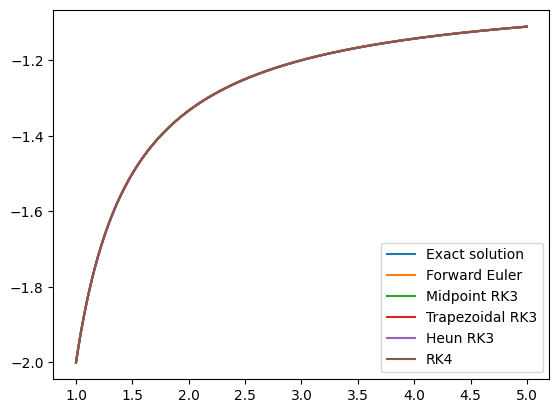

In [ ]:
# Definition of the IVP problem and initial values
f = lambda u,t: (u**2+u)/t
u = lambda t: (2*t)/(1-2*t)
delta = lambda k: 1/(5*2**k)
a, b, k, u0 = 1, 5, delta(0), -2

# Compute the solutions using the different methods
x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]
plt.plot(x_points, exact_solution(u, a, b, k), label='Exact solution')
plt.plot(x_points, forward_euler(f, a, b, k, u0), label='Forward Euler')
plt.plot(x_points, explicit_midpoint(f, a, b, k, u0), label='Midpoint RK3')
plt.plot(x_points, explicit_trapezoidal(f, a, b, k, u0), label='Trapezoidal RK3')
plt.plot(x_points, heun_rk3(f, a, b, k, u0), label='Heun RK3')
plt.plot(x_points, rk4(f, a, b, k, u0), label='RK4')
plt.legend()
plt.show()

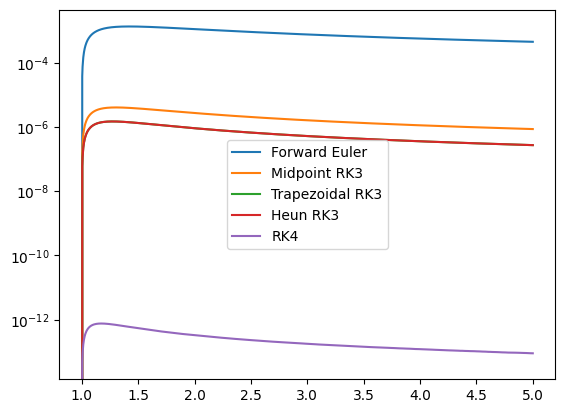

In [133]:
# Compute the solutions using the different methods
error = lambda u, v: [abs(u[i]-v[i]) for i in range(len(u))]

x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]
y_points = exact_solution(u, a, b, k)
y_euler = forward_euler(f, a, b, k, u0)
y_midpoint = explicit_midpoint(f, a, b, k, u0)
y_trapezoid = explicit_trapezoidal(f, a, b, k, u0)
y_heun = heun_rk3(f, a, b, k, u0)
y_rk4 = rk4(f, a, b, k, u0)

plt.semilogy(x_points, error(y_points, y_euler), label='Forward Euler')
plt.semilogy(x_points, error(y_points, y_midpoint), label='Midpoint RK3')
plt.semilogy(x_points, error(y_points, y_trapezoid), label='Trapezoidal RK3')
plt.semilogy(x_points, error(y_points, y_heun), label='Heun RK3')
plt.semilogy(x_points, error(y_points, y_rk4), label='RK4')
plt.legend()
plt.show()
